In [ ]:
import pandas as pd

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Mini Project/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Mini Project/test.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
print("The training dataset:")
print(train.head())
print("The testing dataset:")
print(test.head())

The training dataset:
   profile pic  nums/length username  fullname words  nums/length fullname  \
0            1                  0.27               0                   0.0   
1            1                  0.00               2                   0.0   
2            1                  0.10               2                   0.0   
3            1                  0.00               1                   0.0   
4            1                  0.00               2                   0.0   

   name==username  description length  external URL  private  #posts  \
0               0                  53             0        0      32   
1               0                  44             0        0     286   
2               0                   0             0        1      13   
3               0                  82             0        0     679   
4               0                   0             0        1       6   

   #followers  #follows  fake  
0        1000       955     0  
1        274

In [ ]:
def inspect(df):
    print('\n')
    print('Missing Values: ')
    print(df.isnull().sum())
    print('\n')
    print('Duplicated Values: ')
    print(df.duplicated().sum())
    print('\n')
    print('Data Types: ')
    print(df.dtypes)
    print('\n')
    print(f'Rows: {df.shape[0]}')
    print(f'Attributes: {df.shape[1]}')
    print('\n')
    print('Head: ')
    print('\n')
    return df.head()

In [ ]:
inspect(train)



Missing Values: 
profile pic             0
nums/length username    0
fullname words          0
nums/length fullname    0
name==username          0
description length      0
external URL            0
private                 0
#posts                  0
#followers              0
#follows                0
fake                    0
dtype: int64


Duplicated Values: 
2


Data Types: 
profile pic               int64
nums/length username    float64
fullname words            int64
nums/length fullname    float64
name==username            int64
description length        int64
external URL              int64
private                   int64
#posts                    int64
#followers                int64
#follows                  int64
fake                      int64
dtype: object


Rows: 576
Attributes: 12


Head: 




,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.27,0,0.0,0,53,0,0,32,1000,955,0
1,1,0.00,2,0.0,0,44,0,0,286,2740,533,0
2,1,0.10,2,0.0,0,0,0,1,13,159,98,0
3,1,0.00,1,0.0,0,82,0,0,679,414,651,0
4,1,0.00,2,0.0,0,0,0,1,6,151,126,0


In [ ]:
inspect(test)



Missing Values: 
profile pic             0
nums/length username    0
fullname words          0
nums/length fullname    0
name==username          0
description length      0
external URL            0
private                 0
#posts                  0
#followers              0
#follows                0
fake                    0
dtype: int64


Duplicated Values: 
2


Data Types: 
profile pic               int64
nums/length username    float64
fullname words            int64
nums/length fullname    float64
name==username            int64
description length        int64
external URL              int64
private                   int64
#posts                    int64
#followers                int64
#follows                  int64
fake                      int64
dtype: object


Rows: 120
Attributes: 12


Head: 




,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.33,1,0.33,1,30,0,1,35,488,604,0
1,1,0.00,5,0.00,0,64,0,1,3,35,6,0
2,1,0.00,2,0.00,0,82,0,1,319,328,668,0
3,1,0.00,1,0.00,0,143,0,1,273,14890,7369,0
4,1,0.50,1,0.00,0,76,0,1,6,225,356,0


In [ ]:
train_duplicated = train[train.duplicated(keep=False)]
train_duplicated

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
196,1,0.00,2,0.0,0,48,0,0,222,5282,652,0
197,1,0.00,2,0.0,0,48,0,0,222,5282,652,0
491,1,0.91,1,0.0,0,0,0,0,0,75,26,1
525,1,0.91,1,0.0,0,0,0,0,0,75,26,1


In [ ]:
test_duplicated = test[test.duplicated(keep=False)]
test_duplicated

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
61,1,0.27,1,0.0,0,0,0,0,0,45,64,1
63,0,0.00,1,0.0,1,0,0,0,0,69,694,1
67,0,0.00,1,0.0,1,0,0,0,0,69,694,1
83,1,0.27,1,0.0,0,0,0,0,0,45,64,1


In [ ]:
train.drop_duplicates(inplace = True)
test.drop_duplicates(inplace = True)

In [ ]:
print(f'Train new rows count: {train.shape[0]}')
print(f'Test new rows count: {test.shape[0]}')
print("\n")

Train new rows count: 574
Test new rows count: 118




Categorizing features based on Continues and Binary:


In [ ]:
def categorize_features(df):
    continuous_features = []
    binary_features = []

    for col in df.columns:
        if df[col].nunique() <= 2:
            binary_features.append(col)
        else:
            continuous_features.append(col)
    return continuous_features, binary_features

In [ ]:
continuous_features, binary_features = categorize_features(train)

In [ ]:
print("The continues features are:")
print(continuous_features)
print("\n")
print("The Binary features are:")
print(binary_features)
print("\n")

The continues features are:
['nums/length username', 'fullname words', 'nums/length fullname', 'description length', '#posts', '#followers', '#follows']


The Binary features are:
['profile pic', 'name==username', 'external URL', 'private', 'fake']




Exploratory Data Analysis:

Binary Features

In [ ]:
binary_features.remove('fake')

In [ ]:
print(binary_features)

['profile pic', 'name==username', 'external URL', 'private']


In [ ]:
legend_df = train.copy()
legend_df['fake'] = legend_df['fake'].replace({0: 'Real Accounts', 1: "Fake Accounts"})

# plotting barplots for each binary feature

def create_barplots(df, legend_df):
    for feature in binary_features:
        fig = px.histogram(train, x=feature, color=legend_df['fake'],
                           color_discrete_sequence=['#636EFA','#EF553B'],
                           barmode='group', template='plotly_white',labels={'color': 'Real/Fake'})

        fig.update_layout(title=f'{feature}?',
                          xaxis_title=feature, yaxis_title='Count', xaxis=dict(tickmode='array',
                                                                               tickvals=[0, 1],
                                                                               ticktext=['No', 'Yes']
                                                                               ),
                     height = 650)

        fig.show()

In [ ]:
import numpy as np
import plotly.express as px
create_barplots(train,legend_df)

Insights 💡

Some interesting patterns can be seen from looking at the distributions above:

1. Most accounts with no profile pic are fake accounts;

2. Overall, most accounts which name is the same as the username are also fake accounts;

3. Surprisingly, it seems that all accounts who have an external URL to its bios are real accounts. Overall, most accounts don't have an external URL;

4. Most accounts that are not private are fake accounts, while the majority of those who are indeed private are real accounts

Continuous Features

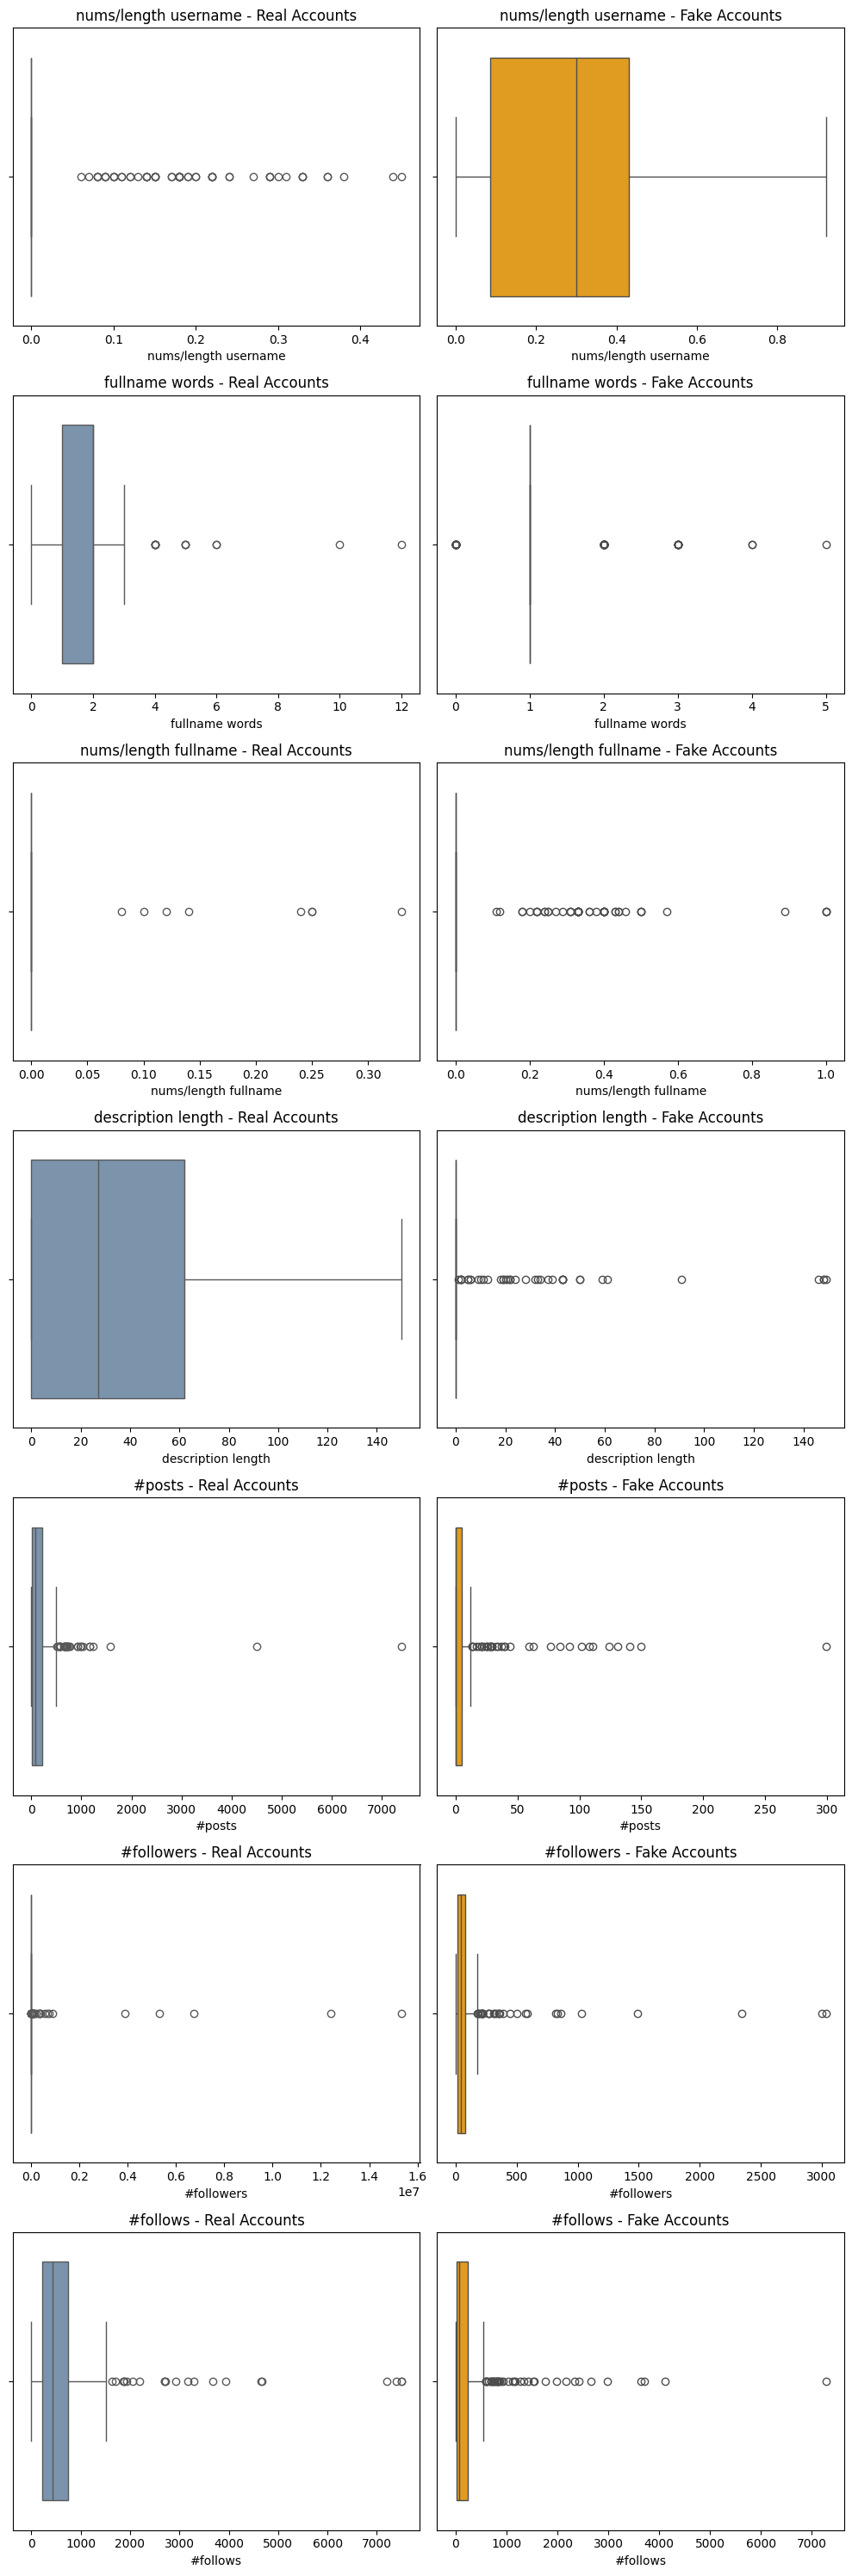

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axes = plt.subplots(nrows=len(continuous_features), ncols=2, figsize=(10, 30))

for i, col in enumerate(continuous_features):
    sns.boxplot(data=train[train['fake'] == 0], x=col, ax=axes[i, 0], color = '#7393B3')
    sns.boxplot(data=train[train['fake'] == 1], x=col, ax=axes[i, 1], color = 'orange')
    axes[i, 0].set_title(col + " - Real Accounts")
    axes[i, 1].set_title(col + " - Fake Accounts")

plt.tight_layout()
plt.show()
print("\n")

Insights 💡

1. Fake accounts seem to have a larger percentage of numbers in their usernames

2. Fake accounts tend to have lesser words in their full names

3. Excluding outliers, it seems that fake accounts have much smaller descriptions/bios

4. Real accounts have much more posts than fake accounts

5. Real accounts have much more followers than fake accounts

4. Overall, excluding outliers, it also seems that most fake accounts follow fewer people than real accounts on average

We can see that we have lots of outliers! For that reason, I'm deciding to build a Random Forest baseline and using Gradient Boosting Algorithms for predictions, since these are robust to outliers.


Target Variable

In [ ]:
fig = px.pie(legend_df, names='fake', title='Target variable distribution', color_discrete_sequence = ['#636EFA','#EF553B'])
fig.update_layout(template = 'ggplot2')
fig.show()

*No class imbalance in the target variable! That's good news. We might go on to the next steps without having to worry about unbalanced classes.

Feature Engineering

While studying the data, I've decided to create 2 new features that I consider that could be relevant to predict the target variable. These are:

Activity Ratio: This is simply a way to measure an account posting activity according to the number of followers it has. It's given by the following equation:


Activity Ratio = (Number of Posts) / (Number of Followers)



#Followers > #Follows ?: At prior, I tend to believe that the majority of fake accounts will have much fewer followers than the amount of people they themselves follow. So this binary feature will tag as either 0 or 1, for each account. Where 1 will imply that that specific account has more followers than they follow. This may turn out to be a relevant feature for target prediction.


In [ ]:
# create activity ratio feature
train['activity ratio'] = np.round(train['#posts'] / train['#followers'], 2)

# Does the account have more followers than follows?
train['#followers > #follows?'] = (train['#followers'] > train['#follows']).astype(int)

In [ ]:
# Visualizing new features on the dataframe
train

/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1010: RuntimeWarning:

invalid value encountered in subtract



,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake,activity ratio,#followers > #follows?
0,1,0.27,0,0.00,0,53,0,0,32,1000,955,0,0.03,1
1,1,0.00,2,0.00,0,44,0,0,286,2740,533,0,0.10,1
2,1,0.10,2,0.00,0,0,0,1,13,159,98,0,0.08,1
3,1,0.00,1,0.00,0,82,0,0,679,414,651,0,1.64,0
4,1,0.00,2,0.00,0,0,0,1,6,151,126,0,0.04,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571,1,0.55,1,0.44,0,0,0,0,33,166,596,1,0.20,0
572,1,0.38,1,0.33,0,21,0,0,44,66,75,1,0.67,0
573,1,0.57,2,0.00,0,0,0,0,4,96,339,1,0.04,0
574,1,0.57,1,0.00,0,11,0,0,0,57,73,1,0.00,0


In [ ]:
fig = px.histogram(train, x=train['#followers > #follows?'], color=legend_df['fake'],
                   color_discrete_sequence=['#636EFA','#EF553B'],
                   barmode='group', template='plotly_white',labels={'color': 'Real/Fake'})

fig.update_layout(title='More Followers than Follows Distribution',
                  xaxis_title='#followers > #follows?', yaxis_title='Count', xaxis=dict(tickmode='array',
                  tickvals=[0, 1],
                  ticktext=['No', 'Yes']),
                  height = 800)

fig.show()

It seems that my prior deduction was right! The majority of accounts who follows more people than they are followed are fake accounts. While accounts with more followers than following, are real accounts.



In [ ]:
fig = px.box(train, x='fake', y='activity ratio', color = legend_df['fake'], title = "Activity Ratio")

fig.update_layout(xaxis_title="Real/Fake", yaxis_title='Count', xaxis=dict(tickmode='array',
                                                                               tickvals=[0, 1],
                                                                               ticktext=['Real Accounts', 'Fake Accounts']
                                                                               ),
                     height = 650)

# Show the plot
fig.show()

Overall, real accounts have a higher activity ratio than fake accounts. However, there are much more outliers, with an extremely positive activity ratio for fake accounts than for real accounts, which may also indicate something for our models when trying to predict the target variable.

In [ ]:
train.isnull().sum()

,0
profile pic,0
nums/length username,0
fullname words,0
nums/length fullname,0
name==username,0
description length,0
external URL,0
private,0
#posts,0
#followers,0


In [ ]:
train.isin([np.inf, -np.inf]).sum()

,0
profile pic,0
nums/length username,0
fullname words,0
nums/length fullname,0
name==username,0
description length,0
external URL,0
private,0
#posts,0
#followers,0


In [ ]:
# replace infinite values with NaN
train.replace([np.inf, -np.inf], np.nan, inplace=True)

# drop rows containing NaN values
train.dropna(inplace=True)

**Modeling**

In [ ]:
# Measuring mean values and standard deviations
df_means = train.mean().round(2)
df_stds = train.std().round(2)
results = pd.concat([df_means, df_stds], axis = 1)
results.columns = ['Mean', 'Standard Deviation']
results

,Mean,Standard Deviation
profile pic,0.72,0.45
nums/length username,0.16,0.21
fullname words,1.47,1.06
nums/length fullname,0.04,0.13
name==username,0.03,0.18
description length,23.27,38.13
external URL,0.12,0.33
private,0.37,0.48
#posts,110.94,408.69
#followers,88366.21,926256.64


We can see that some features such as #followers and #follows are on a much larger scale than the rest of the features in the dataframe, which can introduce bias to our final models.

We're going to add another step to our pipelines to rescale these features using Standard Scaler, to ensure that they are all on the same range of values.

In [ ]:
# Splitting Independent Features X and target variable y
X = train.drop('fake', axis = 1)
y = train.fake

In [ ]:
from sklearn.model_selection import train_test_split
import plotly.graph_objects as go  # DataViz
from plotly.subplots import make_subplots # DataViz
import matplotlib.pyplot as plt # DataViz
import seaborn as sns # DataViz
from sklearn.pipeline import Pipeline # Pipeline for chaining multiple data preprocessing steps
from sklearn.preprocessing import StandardScaler # Data rescaling
from sklearn.model_selection import train_test_split # Data splitting
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, recall_score # Evaluation Metrics
from sklearn.preprocessing import FunctionTransformer

# Models
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
# Spitting data into training and validation sets. 35% of data will be used for validation
X_train, X_val, y_train, y_val = train_test_split(X, y,
                                                 test_size = 0.35, random_state = 123)

In [ ]:
# Defining models
models = {
    "XGBoost": XGBClassifier(random_state = 42),
    "LGBM": LGBMClassifier(random_state = 42),
    "CatBoost": CatBoostClassifier(verbose=False, random_state = 42),
    "AdaBoost": AdaBoostClassifier(random_state = 42)
}

# Defining the pipeline process for each model
pipelines = {}
for name, model in models.items():
    pipelines[name] = Pipeline([
        ("scaler", StandardScaler()), # Rescaling data
        ("model", model) # Initializing model
    ])

# Fitting and computing AUC-ROC scores
results = {}
for name, pipeline in pipelines.items():
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_val)
    auc = roc_auc_score(y_val, y_pred)
    results[name] = {
        "pipeline": pipeline,
        "auc": auc
    }
    print(f"{name}: AUC-ROC score = {auc:.2f}")


XGBoost: AUC-ROC score = 0.90
[LightGBM] [Info] Number of positive: 181, number of negative: 180
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000119 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 435
[LightGBM] [Info] Number of data points in the train set: 361, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501385 -> initscore=0.005540
[LightGBM] [Info] Start training from score 0.005540
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spl

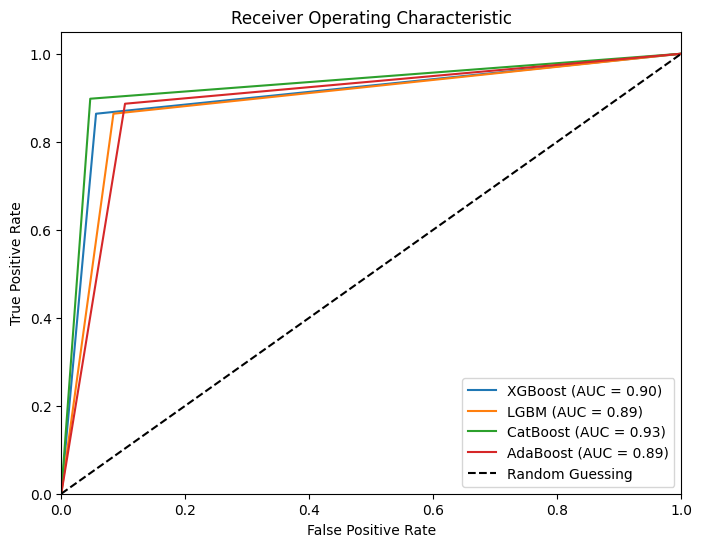

In [ ]:
# Plot AUC-ROC curve for all models
plt.figure(figsize=(8, 6))
for name, result in results.items():
    fpr, tpr, _ = roc_curve(y_val, result["pipeline"].predict(X_val))
    plt.plot(fpr, tpr, label=f"{name} (AUC = {result['auc']:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label = 'Random Guessing')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Overall, most models didn't perform any better than the baseline. The CatBoost was the one that achieved the highest performance, being the only one that outperformed the baseline.


**Testing**

After training and validating different models, we reach the conclusion that the **CatBoost model** performed better.

Now, we can test our model performance on the test set. Before doing that, we need to perform the same procedures we've performed previously on the testing/val sets. First, I'll create the new features in the test set and use the Pipeline to guarantee that the same rescaling process done on the training/val sets will be done on the testing set.

In [ ]:
# Creating activity ratio feature
test['activity ratio'] = np.round(test['#posts'] / test['#followers'], 2)

# Does the account has more followers than follows?
test['#followers > #follows?'] = (test['#followers'] > test['#follows']).astype(int)

# replace infinite values with NaN
test.replace([np.inf, -np.inf], np.nan, inplace=True)

# drop rows containing NaN values
test.dropna(inplace=True)

In [ ]:
test

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake,activity ratio,#followers > #follows?
0,1,0.33,1,0.33,1,30,0,1,35,488,604,0,0.07,0
1,1,0.00,5,0.00,0,64,0,1,3,35,6,0,0.09,1
2,1,0.00,2,0.00,0,82,0,1,319,328,668,0,0.97,0
3,1,0.00,1,0.00,0,143,0,1,273,14890,7369,0,0.02,1
4,1,0.50,1,0.00,0,76,0,1,6,225,356,0,0.03,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,1,0.29,1,0.00,0,0,0,0,13,114,811,1,0.11,0
116,1,0.40,1,0.00,0,0,0,0,4,150,164,1,0.03,0
117,1,0.00,2,0.00,0,0,0,0,3,833,3572,1,0.00,0
118,0,0.17,1,0.00,0,0,0,0,1,219,1695,1,0.00,0


In [ ]:
X = test.drop('fake', axis = 1) # Independent variables
y = test.fake # target variable

In [ ]:
X # Displaying independent variables


,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,activity ratio,#followers > #follows?
0,1,0.33,1,0.33,1,30,0,1,35,488,604,0.07,0
1,1,0.00,5,0.00,0,64,0,1,3,35,6,0.09,1
2,1,0.00,2,0.00,0,82,0,1,319,328,668,0.97,0
3,1,0.00,1,0.00,0,143,0,1,273,14890,7369,0.02,1
4,1,0.50,1,0.00,0,76,0,1,6,225,356,0.03,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,1,0.29,1,0.00,0,0,0,0,13,114,811,0.11,0
116,1,0.40,1,0.00,0,0,0,0,4,150,164,0.03,0
117,1,0.00,2,0.00,0,0,0,0,3,833,3572,0.00,0
118,0,0.17,1,0.00,0,0,0,0,1,219,1695,0.00,0


In [ ]:
y.value_counts()

,count
fake,
0,60
1,56


In [ ]:
catboost_pipeline = results["CatBoost"]["pipeline"] # Creating a CatBoost model

y_pred = catboost_pipeline.predict(X) # Predicting on test data

CatBoos: AUC-ROC score on unseen data = 0.9214


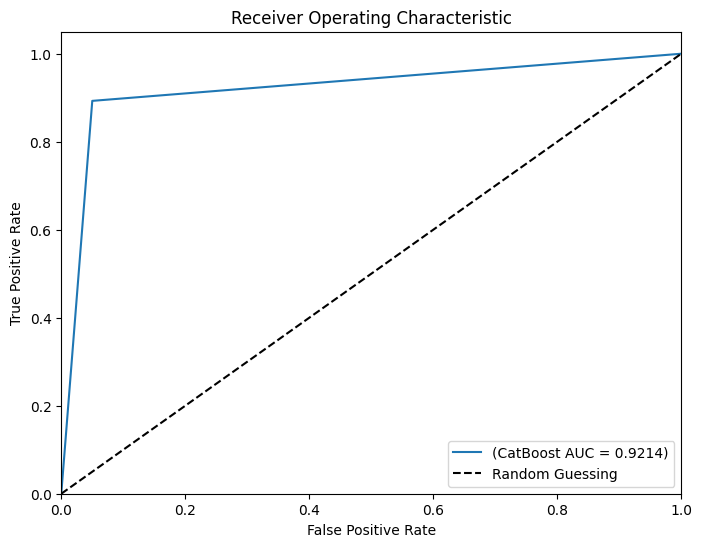

Value counts for y:
fake
0    60
1    56
Name: count, dtype: int64


Value counts for y_pred:
0    63
1    53
Name: count, dtype: int64




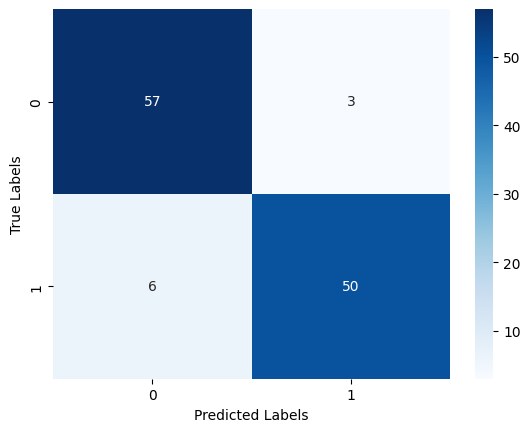



Recall Score: 89.0%


In [ ]:
# Computing AUC-ROC score
auc = roc_auc_score(y, y_pred)
print(f"CatBoos: AUC-ROC score on unseen data = {auc:.4f}")

# Plotting ROC curve
plt.figure(figsize=(8, 6))
fpr, tpr, _ = roc_curve(y, catboost_pipeline.predict(X))
plt.plot(fpr, tpr, label=f"(CatBoost AUC = {auc:.4f})")
plt.plot([0, 1], [0, 1], 'k--', label = 'Random Guessing')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Printing value counts
print("Value counts for y:")
print(y.value_counts())
print('\n')
print("Value counts for y_pred:")
print(pd.Series(y_pred).value_counts())
print('\n')
# Plotting confusion matrix
cm = confusion_matrix(y, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()
print('\n')
print(f'Recall Score: {np.round(recall_score(y, y_pred),2) * 100}%') # Printing Recall Score

Our final model has reached an **AUC-ROC score of 0.9214**, indicating that it is efficient in classifying and identifying fake Instagram accounts.

In the original y test, we have 60 real accounts and 56 fake accounts, while our model identified 63 real accounts and 53 fake accounts. We can see, on the Confusion Matrix that we've had 6 false negatives, that is, 6 fake accounts that the model classified as real. We've also had 3 fake positives, which are real accounts that the model identified as fake.

Finally, **the Recall Score shows us that the model correctly flagged 89% of fake accounts, 50 out of 56.**
